<a href="https://colab.research.google.com/github/RafsanJany-44/Research_Sleep_Stage_Classification/blob/main/ANN_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [3]:
#Loading Dataset
data = pd.read_csv("https://raw.githubusercontent.com/RafsanJany-44/Thesis_Project/main/All_DATA/without_sn_and_Epoch/EEG_HMC.csv")

In [4]:
X = data.iloc[:, 1:].values
Y = data.iloc[:, 0].values

In [5]:
#Encoding Categorical the sleep_stage
from sklearn.preprocessing import LabelEncoder
LE1 = LabelEncoder()
Y = np.array(LE1.fit_transform(Y))

In [6]:
#Encoding Categorical variable Geography
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct =ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder="passthrough")
X = np.array(ct.fit_transform(X))

In [7]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [8]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
len(X_train)

86760

In [10]:
len(X_test)

21691

In [11]:
X_train.shape


(86760, 215)

In [12]:
model = keras.Sequential([
    keras.layers.Dense(500, input_shape=(215,), activation='relu'), # input layer
    keras.layers.Dense(350, activation='sigmoid'),
    keras.layers.Dense(250, activation='sigmoid'),
    keras.layers.Dense(150, activation='sigmoid'),
    keras.layers.Dense(75, activation='softmax')                    # output layer
])

'''model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(215,), activation='relu'), # input layer
    #keras.layers.Dense(350, activation='sigmoid'),
    #keras.layers.Dense(250, activation='sigmoid'),
    keras.layers.Dense(75, activation='sigmoid'),
    keras.layers.Dense(25, activation='softmax')                    # output layer
])'''




model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=560)

Epoch 1/560
2712/2712 [==============================] - 19s 7ms/step - loss: 0.9218 - accuracy: 0.6350
Epoch 2/560
2712/2712 [==============================] - 19s 7ms/step - loss: 0.7663 - accuracy: 0.6971
Epoch 3/560
2712/2712 [==============================] - 22s 8ms/step - loss: 0.7125 - accuracy: 0.7185
Epoch 4/560
2712/2712 [==============================] - 18s 7ms/step - loss: 0.6728 - accuracy: 0.7349
Epoch 5/560
2712/2712 [==============================] - 20s 7ms/step - loss: 0.6418 - accuracy: 0.7451
Epoch 6/560
2712/2712 [==============================] - 20s 7ms/step - loss: 0.6146 - accuracy: 0.7576
Epoch 7/560
2712/2712 [==============================] - 20s 7ms/step - loss: 0.5911 - accuracy: 0.7665
Epoch 8/560
2712/2712 [==============================] - 19s 7ms/step - loss: 0.5703 - accuracy: 0.7747
Epoch 9/560
2712/2712 [==============================] - 19s 7ms/step - loss: 0.5480 - accuracy: 0.7825
Epoch 10/560
2712/2712 [==============================] - 20s 7m

In [19]:
model.evaluate(X_test, y_test)

678/678 [==============================] - 2s 4ms/step - loss: 1.5923 - accuracy: 0.7453


[1.5922640562057495, 0.7453321814537048]

#Confusion Matrix

In [20]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_predicted_labels))
print(classification_report(y_test,y_predicted_labels))
print("Accurecy: ",accuracy_score(y_test, y_predicted_labels))

[[ 864  629   25  341  509]
 [ 393 6278  671  380  169]
 [  21  871 3329   12   21]
 [ 281  428   23 2572   70]
 [ 393  197   23   67 3124]]
              precision    recall  f1-score   support

           0       0.44      0.36      0.40      2368
           1       0.75      0.80      0.77      7891
           2       0.82      0.78      0.80      4254
           3       0.76      0.76      0.76      3374
           4       0.80      0.82      0.81      3804

    accuracy                           0.75     21691
   macro avg       0.71      0.71      0.71     21691
weighted avg       0.74      0.75      0.74     21691

Accurecy:  0.7453321654142271


In [22]:
def confusion_details(y_test,y_pred):
    labels = list(set(y_test))
    labels.sort()

    print("Total labels: %s -> %s" % (len(labels), labels))

    df = pd.DataFrame(
        data=confusion_matrix(y_test, y_pred, labels=labels),
        columns=labels,
        index=labels
    )

    print(df)

    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()
    #
    # Local (metrics per class)
    #
    tps = {}
    fps = {}
    fns = {}
    tns = {}

    precision_local = {}
    recall_local = {}
    f1_local = {}
    accuracy_local = {}
    specificity_local={}

    for label in labels:
        tps[label] = df.loc[label, label]
        fps[label] = df[label].sum() - tps[label]
        fns[label] = df.loc[label].sum() - tps[label]
        tns[label]=len(y_test) - (tps[label] + fps[label] + fns[label])
        
        tp, fp, fn, tn = tps[label], fps[label], fns[label], tns[label]
        
        precision_local[label] = tp / (tp + fp) if (tp + fp) > 0. else 0.
        specificity_local[label] = tn / (tn + fp) if (tn + fp) > 0. else 0.
        recall_local[label] = tp / (tp + fn) if (tp + fp) > 0. else 0.
        p, r = precision_local[label], recall_local[label]
        
        f1_local[label] = 2. * p * r / (p + r) if (p + r) > 0. else 0.
        accuracy_local[label] = tp / (tp + fp + fn) if (tp + fp + fn) > 0. else 0.



    print("#-- Local measures --#")
    print("True Positives(TP):", tps)
    print("False Positives(FP):", fps)
    print("True Negatives(TN):", tns)
    print("False Negatives(FN):", fns)
    print("----------------------------")

    print("Precision:", precision_local)
    print("Recall/Sensitivity:", recall_local)
    print("Specificity:",specificity_local)
    print("F1-Score:", f1_local)
    print("Accuracy:", accuracy_local)


    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()
    #
    # Global
    #
    micro_averages = {}
    macro_averages = {}

    correct_predictions = sum(tps.values())
    true_negative=sum(tns.values())

    den = sum(list(tps.values()) + list(fps.values()))
    micro_averages["Precision"] = 1. * correct_predictions / den if den > 0. else 0.

    den = sum(list(tps.values()) + list(fns.values()))
    micro_averages["Recall"] = 1. * correct_predictions / den if den > 0. else 0.

    den = sum(list(tns.values()) + list(fps.values()))
    micro_averages["Specificity"] = 1. * true_negative / den if den > 0. else 0.


    micro_avg_p, micro_avg_r = micro_averages["Precision"], micro_averages["Recall"]
    micro_averages["F1-score"] = 2. * micro_avg_p * micro_avg_r / (micro_avg_p + micro_avg_r) if (micro_avg_p + micro_avg_r) > 0. else 0.

    macro_averages["Precision"] = np.mean(list(precision_local.values()))
    macro_averages["Recall"] = np.mean(list(recall_local.values()))
    macro_averages["Specificity"]=np.mean(list(specificity_local.values()))


    macro_avg_p, macro_avg_r = macro_averages["Precision"], macro_averages["Recall"]
    macro_averages["F1-Score"] = 2. * macro_avg_p * macro_avg_r / (macro_avg_p + macro_avg_r) if (macro_avg_p + macro_avg_r) > 0. else 0.

    total_predictions = df.values.sum()
    accuracy_global = correct_predictions / total_predictions if total_predictions > 0. else 0.

    print("#-- Global measures --#")
    print("Micro-Averages:", micro_averages)
    print("Macro-Averages:", macro_averages)
    print("Correct predictions:", correct_predictions)
    print("Total predictions:", total_predictions)
    print("Accuracy:", accuracy_global)


    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()



    accuracy_local_new = {}
    for label in labels:
        tp, fp, fn, tn = tps[label], fps[label], fns[label], tns[label]
        accuracy_local_new[label] = (tp + tn) / (tp + fp + fn + tn) if (tp + fp + fn + tn) > 0. else 0.

    total_true = sum(list(tps.values()) + list(tns.values()))
    total_predictions = sum(list(tps.values()) + list(tns.values()) + list(fps.values()) + list(fns.values()))
    accuracy_global_new = 1. * total_true / total_predictions if total_predictions > 0. else 0.

    print("Accuracy (per class), with TNs:", accuracy_local_new)
    print("Accuracy (per class), without TNs:", accuracy_local)
    print("Accuracy (global), with TNs:", accuracy_global_new)
    print("Accuracy (global), without TNs:", accuracy_global)

In [25]:
confusion_details(y_test,y_predicted_labels)

Total labels: 5 -> [0, 1, 2, 3, 4]
     0     1     2     3     4
0  864   629    25   341   509
1  393  6278   671   380   169
2   21   871  3329    12    21
3  281   428    23  2572    70
4  393   197    23    67  3124

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------

#-- Local measures --#
True Positives(TP): {0: 864, 1: 6278, 2: 3329, 3: 2572, 4: 3124}
False Positives(FP): {0: 1088, 1: 2125, 2: 742, 3: 800, 4: 769}
True Negatives(TN): {0: 18235, 1: 11675, 2: 16695, 3: 17517, 4: 17118}
False Negatives(FN): {0: 1504, 1: 1613, 2: 925, 3: 802, 4: 680}
----------------------------
Precision: {0: 0.4426229508196721, 1: 0.747114125907414, 2: 0.8177352001965119, 3: 0.7627520759193357, 4: 0.8024659645517596}
Recall/Sensitivity: {0: 0.36486486486486486, 1: 0.7955899125586111, 2: 0.7825575928537847, 3: 0.7622999407231772, 4: 0.8212407991587802}
Specificity: {0: 0.9

**Now we need to draw the confusion matrix to show where our model is doing mistakes**
<br>
<br>
***Tensorflow has its own confusion matrix function where "labels" is the truth data and "predictions" is the predicted data***

In [23]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

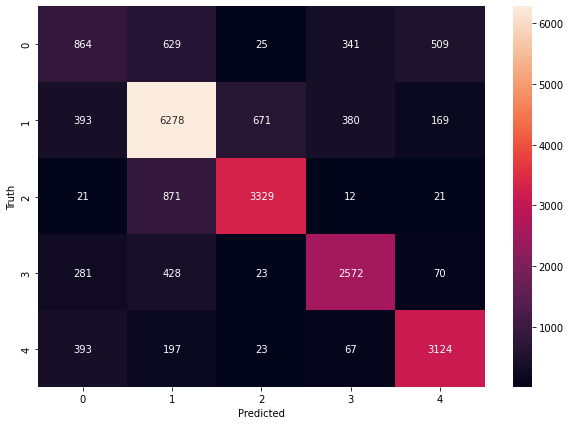

In [24]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d') # here, cm is called to be visualized
plt.xlabel('Predicted')
plt.ylabel('Truth')

#ROC graph